# DScubed Data Insights Challenge 

by Wing Lok Oliver Chan

Data Wrangling

In [ ]:
import pandas as pd
df = pd.read_csv('Unimelb datathon.csv')
df = df.drop('vin', axis=1)


# Split the 'saledate' column into parts
parts = df['saledate'].str.split(' ', expand=True)

# Assign each part to a new column
df['dow'] = parts[0]  # "Tue"
df['date'] = parts[1] + ' ' + parts[2] + ' ' + parts[3]  # "Dec 16 2014"
df['time'] = parts[4]  # "12:30:00"
df['GMT'] = parts[5]  # "GMT-0800"
df['GMT'] = df['GMT'].str.replace('GMT-', '', regex=False)
df['timezone'] = parts[6].str.strip('()')  # "PST" without the parentheses
df = df.drop(['saledate', 'timezone'], axis=1)

df['make'] = df['make'].str.lower()
df['body'] = df['body'].str.lower()
df['model'] = df['model'].str.lower()

df['difference'] = df['sellingprice']-df['mmr']

df = df.dropna()

# Define a function to standardize the body types
def standardize_body_type(body):
    mappings = {
        'transit van': 'van',
        'sedan': 'sedan',
        'cab': 'cab',
        'wagon': 'wagon',
        'hatchback': 'hatchback',
        'coup': 'coup',
        'koup': 'coup',
        'convertible': 'convertible',
        'van': 'van',
        'supercrew': 'supercrew'
    }
    # Lowercase to handle case insensitivity
    body = body.lower()
    for key in mappings:
        if key in body:
            return mappings[key]
    return body  # Return the original if no specific mappings are found

# Apply the function to create a new column
df['standardized_body'] = df['body'].apply(standardize_body_type)

df

Check for NA values

In [95]:
na_counts = df.isna().sum()
print(na_counts)


year                 0
make                 0
model                0
trim                 0
body                 0
transmission         0
state                0
condition            0
odometer             0
color                0
interior             0
seller               0
mmr                  0
sellingprice         0
dow                  0
date                 0
time                 0
GMT                  0
difference           0
standardized_body    0
dtype: int64


Describe basic statistics 

In [96]:
df_describe = df.describe()
df_info = df.info()

df_describe, df_info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472325 entries, 0 to 558836
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               472325 non-null  int64  
 1   make               472325 non-null  object 
 2   model              472325 non-null  object 
 3   trim               472325 non-null  object 
 4   body               472325 non-null  object 
 5   transmission       472325 non-null  object 
 6   state              472325 non-null  object 
 7   condition          472325 non-null  float64
 8   odometer           472325 non-null  float64
 9   color              472325 non-null  object 
 10  interior           472325 non-null  object 
 11  seller             472325 non-null  object 
 12  mmr                472325 non-null  float64
 13  sellingprice       472325 non-null  float64
 14  dow                472325 non-null  object 
 15  date               472325 non-null  object 
 16  ti

(                year      condition       odometer            mmr  \
 count  472325.000000  472325.000000  472325.000000  472325.000000   
 mean     2010.210980      30.774177   66701.732040   13837.058964   
 std         3.822151      13.286866   51939.586894    9532.229273   
 min      1990.000000       1.000000       1.000000      25.000000   
 25%      2008.000000      24.000000   28137.000000    7425.000000   
 50%      2012.000000      35.000000   51085.000000   12300.000000   
 75%      2013.000000      41.000000   96590.000000   18300.000000   
 max      2015.000000      49.000000  999999.000000  182000.000000   
 
         sellingprice     difference  
 count  472325.000000  472325.000000  
 mean    13690.512058    -146.546905  
 std      9613.033738    1741.175011  
 min         1.000000  -87750.000000  
 25%      7200.000000    -800.000000  
 50%     12200.000000     -50.000000  
 75%     18200.000000     650.000000  
 max    230000.000000  207200.000000  ,
 None)

In [98]:
# unique_make = df['make'].unique()
# print(unique_make)

Car Sales Trends Over Time Plot

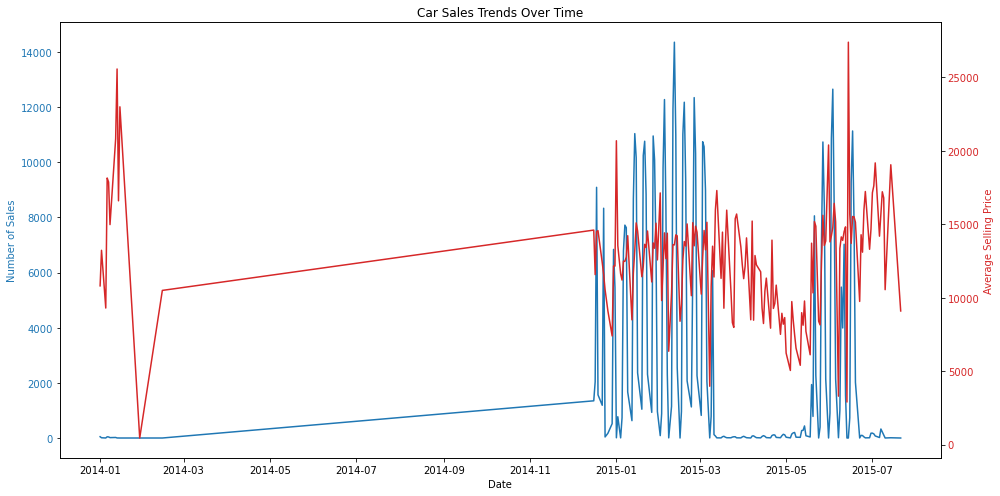

In [101]:
import matplotlib.pyplot as plt

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Creating a time series plot of the number of sales and average selling prices over time
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot number of sales
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Sales', color=color)
ax1.plot(df.groupby('date')['sellingprice'].count().index, df.groupby('date')['sellingprice'].count().values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Average Selling Price', color=color)
ax2.plot(df.groupby('date')['sellingprice'].mean().index, df.groupby('date')['sellingprice'].mean().values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show the plot
plt.title('Car Sales Trends Over Time')
fig.tight_layout()  # to ensure the layout does not get clipped
plt.show()


More EDA stuff

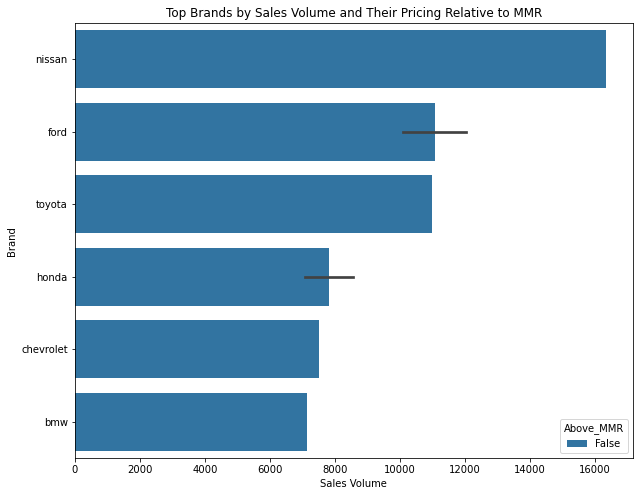

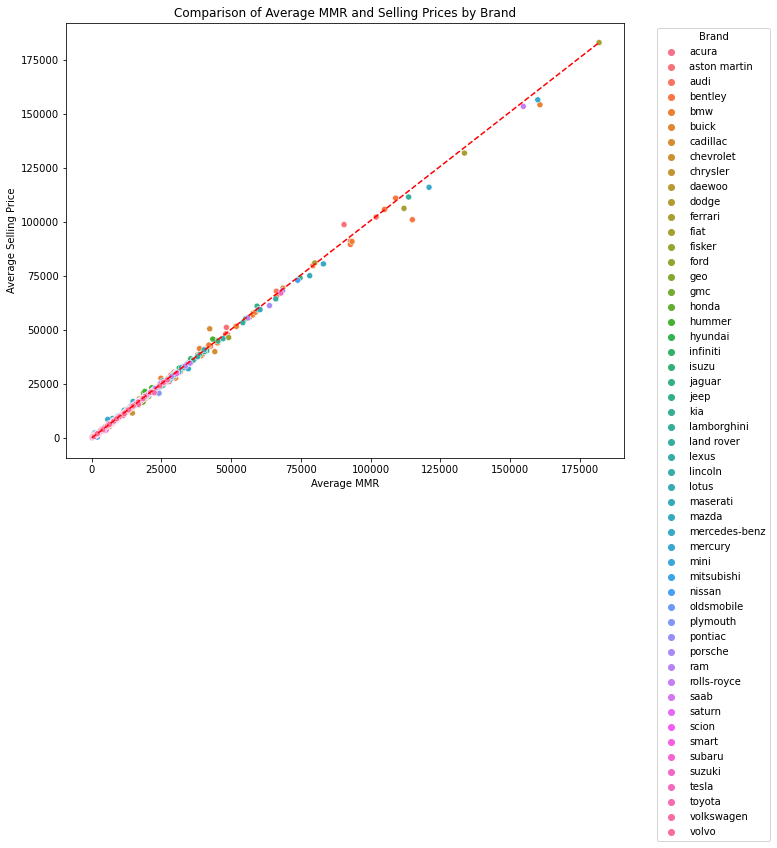

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by 'make' and 'model' to find average selling price, average MMR, and count
brand_model_performance = df.groupby(['make', 'model']).agg(
    Average_Selling_Price=pd.NamedAgg(column='sellingprice', aggfunc='mean'),
    Average_MMR=pd.NamedAgg(column='mmr', aggfunc='mean'),
    Sales_Volume=pd.NamedAgg(column='sellingprice', aggfunc='count')
).reset_index()

# Adding a column to check if the selling price is often higher than the MMR
brand_model_performance['Above_MMR'] = brand_model_performance['Average_Selling_Price'] > brand_model_performance['Average_MMR']

# Sort by sales volume for visualization
brand_model_performance_sorted = brand_model_performance.sort_values(by='Sales_Volume', ascending=False)

# Plotting top 10 brands and models by sales volume
plt.figure(figsize=(10, 8))
sns.barplot(x='Sales_Volume', y='make', data=brand_model_performance_sorted.head(10), hue='Above_MMR')
plt.title('Top Brands by Sales Volume and Their Pricing Relative to MMR')
plt.xlabel('Sales Volume')
plt.ylabel('Brand')
plt.show()

# Plotting price comparison
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Average_MMR', y='Average_Selling_Price', data=brand_model_performance, hue='make')
plt.title('Comparison of Average MMR and Selling Prices by Brand')
plt.xlabel('Average MMR')
plt.ylabel('Average Selling Price')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.plot([0, max(brand_model_performance['Average_MMR'])], [0, max(brand_model_performance['Average_Selling_Price'])], 'r--')
plt.show()


Heatmap

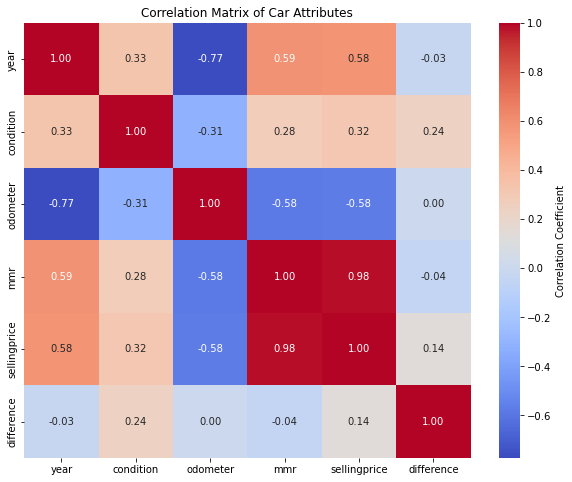

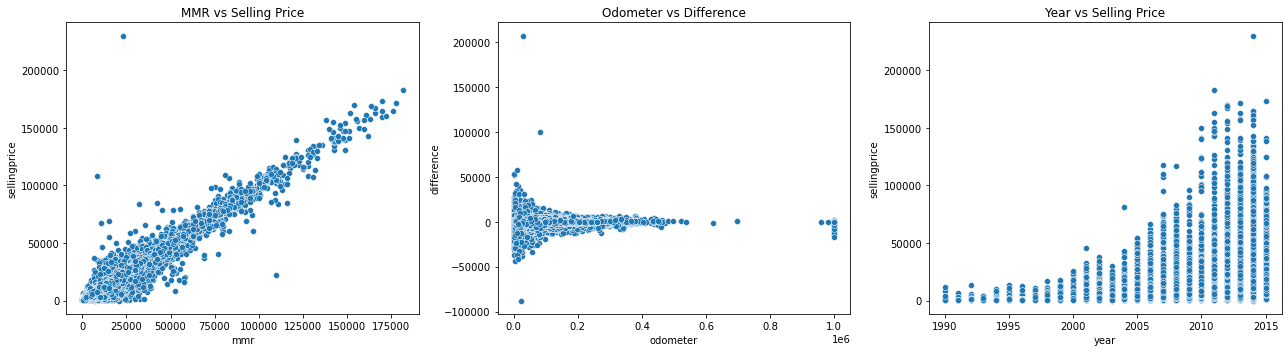

In [103]:
# Selecting relevant columns for correlation analysis
correlation_data = df[['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'difference']]

# Calculating the correlation matrix
corr_matrix = correlation_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Car Attributes')
plt.show()

# Creating scatter plots for the most significant correlations with 'sellingprice'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(ax=axes[0], data=df, x='mmr', y='sellingprice').set(title='MMR vs Selling Price')
sns.scatterplot(ax=axes[1], data=df, x='odometer', y='difference').set(title='Odometer vs Difference')
sns.scatterplot(ax=axes[2], data=df, x='year', y='sellingprice').set(title='Year vs Selling Price')
plt.tight_layout()
plt.show()


Area Frequency graphs

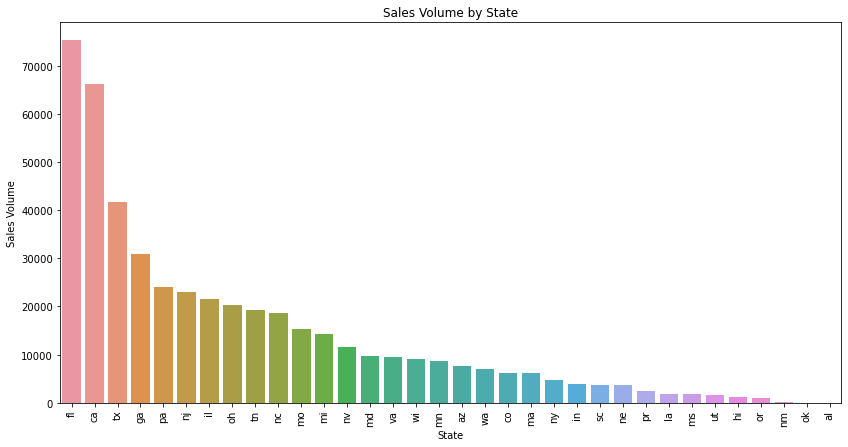

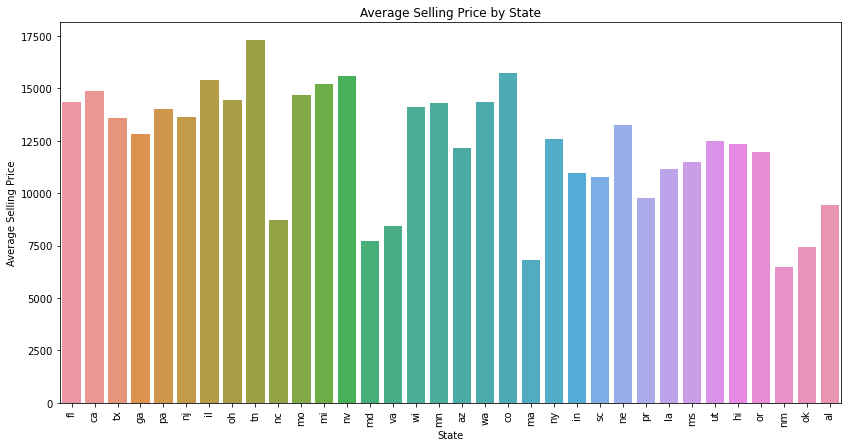

In [104]:
# Grouping data by state to find average selling price and sales volume
state_performance = df.groupby('state').agg(
    Average_Selling_Price=pd.NamedAgg(column='sellingprice', aggfunc='mean'),
    Sales_Volume=pd.NamedAgg(column='sellingprice', aggfunc='count')
).reset_index()

# Sort data for better visualization
state_performance_sorted = state_performance.sort_values(by='Sales_Volume', ascending=False)

# Plotting sales volume by state
plt.figure(figsize=(14, 7))
sns.barplot(x='state', y='Sales_Volume', data=state_performance_sorted)
plt.title('Sales Volume by State')
plt.xlabel('State')
plt.ylabel('Sales Volume')
plt.xticks(rotation=90)  # Rotating state labels for better visibility
plt.show()

# Plotting average selling price by state
plt.figure(figsize=(14, 7))
sns.barplot(x='state', y='Average_Selling_Price', data=state_performance_sorted)
plt.title('Average Selling Price by State')
plt.xlabel('State')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.show()


Multivariate Linear Regression

Market Segmentation via K means clustering

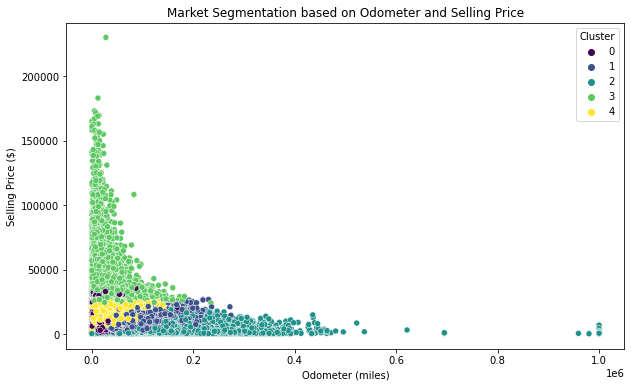

In [106]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
features = df[['year', 'odometer', 'condition', 'sellingprice', 'mmr']]
scaler = StandardScaler()

# Normalize features
X_scaled = scaler.fit_transform(features)

# Implement K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster information back to the DataFrame
df['Cluster'] = clusters

# Analyze clusters
cluster_summary = df.groupby('Cluster').mean()

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='sellingprice', hue='Cluster', palette='viridis')
plt.title('Market Segmentation based on Odometer and Selling Price')
plt.xlabel('Odometer (miles)')
plt.ylabel('Selling Price ($)')
plt.show()


Atteimpt to make it interactive